In [1]:
import cv2
import numpy as np
import tensorflow as tf
import torch
from torchvision import transforms
from transformers import ViTForImageClassification

# Load the face cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Define the emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Load your pre-trained model (make sure it's a PyTorch model)
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.eval()  # Set the model to evaluation mode

# Transformation to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the tensor
])

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop over each detected face
    for (x, y, w, h) in faces:
        # Extract the face ROI (Region of Interest)
        face_roi = frame[y:y+h, x:x+w]

        # Resize the face ROI to the expected input shape of the model
        resized_face = cv2.resize(face_roi, (224, 224))

        # Convert the resized face to a PyTorch tensor
        face_tensor = transform(resized_face)
        face_tensor = face_tensor.unsqueeze(0)  # Add batch dimension

        # Make predictions using the model
        with torch.no_grad():
            predictions = model(face_tensor)
            print(f"Predictions: {predictions.logits}")  # Debug print
            predicted_index = torch.argmax(predictions.logits, axis=1).item()
            print(f"Predicted Index: {predicted_index}")  # Debug print
            if predicted_index >= len(emotion_labels):
                print("Warning: Predicted index out of range for emotion labels.")
                predicted_emotion = "Unknown"
            else:
                predicted_emotion = emotion_labels[predicted_index]

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the predicted emotion label above the face rectangle
        cv2.putText(frame, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


Predictions: tensor([[-7.5347e-01, -4.8533e-03, -6.8456e-01, -6.8273e-01, -4.3220e-01,
         -7.6859e-01, -1.1158e+00, -6.7349e-01, -7.1147e-01, -1.3236e+00,
         -1.6138e+00, -2.0807e+00, -1.2347e+00, -1.7577e+00, -1.0631e+00,
         -6.4838e-01, -1.2111e+00, -1.0782e+00, -4.0890e-01, -2.3992e+00,
         -2.0168e+00, -8.5334e-01, -4.4215e-01, -6.8722e-01, -1.2909e+00,
         -7.6891e-01, -6.4932e-01, -8.8991e-02, -3.8658e-01, -4.0508e-01,
         -1.5019e+00, -5.9707e-01, -1.4451e+00, -1.4759e+00, -1.9583e+00,
         -2.0554e+00, -1.1916e+00, -1.3089e+00, -1.3082e+00, -1.3158e+00,
         -1.0691e+00, -1.5300e+00, -1.6860e+00, -1.1595e+00, -2.0051e+00,
         -1.1837e+00, -1.0780e+00, -2.0836e+00, -2.2145e+00, -2.4750e+00,
         -2.7031e+00, -1.6336e+00, -5.2349e-01, -3.9047e-01, -1.3453e+00,
         -1.1874e+00, -2.9065e-01, -1.6939e+00, -1.7478e+00, -5.4227e-01,
         -5.7869e-01, -7.3262e-01, -1.0597e+00, -1.7174e-01, -1.6644e+00,
         -1.8350e+00, -1.

In [2]:
import cv2
import numpy as np
import tensorflow as tf
import torch
from torchvision import transforms
from transformers import ViTForImageClassification, ViTConfig

# Load the face cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Define the emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Load your pre-trained model from the specified local path
model_path = "C:/Users/osyed/vit_model"
model = ViTForImageClassification.from_pretrained(model_path)
model.eval()  # Set the model to evaluation mode

# Transformation to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the tensor
])

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop over each detected face
    for (x, y, w, h) in faces:
        # Extract the face ROI (Region of Interest)
        face_roi = frame[y:y+h, x:x+w]

        # Resize the face ROI to the expected input shape of the model
        resized_face = cv2.resize(face_roi, (224, 224))

        # Convert the resized face to a PyTorch tensor
        face_tensor = transform(resized_face)
        face_tensor = face_tensor.unsqueeze(0)  # Add batch dimension

        # Make predictions using the model
        with torch.no_grad():
            predictions = model(face_tensor)
            print(f"Predictions: {predictions.logits}")  # Debug print
            predicted_index = torch.argmax(predictions.logits, axis=1).item()
            print(f"Predicted Index: {predicted_index}")  # Debug print
            if predicted_index >= len(emotion_labels):
                print("Warning: Predicted index out of range for emotion labels.")
                predicted_emotion = "Unknown"
            else:
                predicted_emotion = emotion_labels[predicted_index]

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the predicted emotion label above the face rectangle
        cv2.putText(frame, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


Predictions: tensor([[-0.1238, -2.9117,  1.6056,  0.3161,  1.1535, -0.8753, -1.0937]])
Predicted Index: 2
Predictions: tensor([[-0.0357, -2.7564,  1.2371,  0.3027,  0.3183, -0.1878, -0.5500]])
Predicted Index: 2
Predictions: tensor([[-0.7139, -2.4274, -0.5400,  2.5958,  0.8671, -0.9391, -0.4869]])
Predicted Index: 3
Predictions: tensor([[-0.5061, -2.5304, -0.2860,  2.2317,  0.8845, -0.9735, -0.5711]])
Predicted Index: 3
Predictions: tensor([[-0.8552, -2.5385, -0.4296,  2.5459,  0.6900, -0.8731,  0.1266]])
Predicted Index: 3
Predictions: tensor([[-0.7726, -1.3037, -0.8581,  3.5636, -1.2864, -1.2523,  1.9031]])
Predicted Index: 3
Predictions: tensor([[-0.8476, -1.3929, -0.9176,  3.6623, -1.0719, -1.1593,  1.5558]])
Predicted Index: 3
Predictions: tensor([[-0.9176, -1.4048, -0.8906,  3.6664, -1.0801, -1.0935,  1.6210]])
Predicted Index: 3
Predictions: tensor([[-0.0153, -2.1657,  0.9948,  0.2641,  0.3414, -0.3559, -0.4482]])
Predicted Index: 2
Predictions: tensor([[-0.1283, -2.3433,  0.737

C:\Users\osyed\AppData\Local\Temp\ipykernel_15000\2727134598.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_image_per_class = df.groupby('label').first().reset_index()


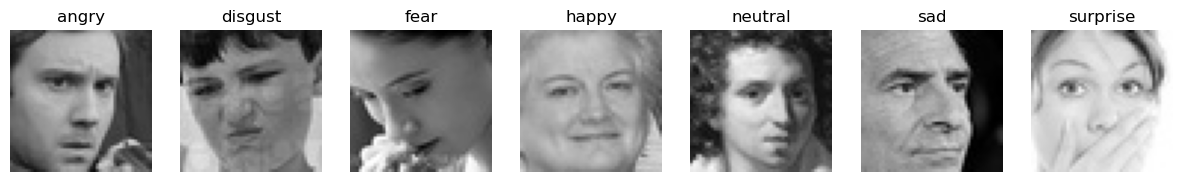

In [9]:
import pandas as pd
from PIL import Image
from pathlib import Path

# Load and prepare dataset
base_path = Path('C:/Users/osyed/OneDrive/Desktop/FacialEmotionRecognition/images/images')
if not base_path.exists():
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")

file_names, labels, images = [], [], []
for file in sorted(base_path.glob('*/*/*.*')):
    labels.append(file.parts[-2])
    file_names.append(str(file))
    with Image.open(file) as image:
        image = image.convert("RGB")
        images.append(image)

# Create DataFrame
df = pd.DataFrame({"image": images, "label": labels})
df['label'] = df['label'].astype('category')

# Get one image from each label class
one_image_per_class = df.groupby('label').first().reset_index()

# If you need to extract file names and labels along with images
selected_images = []
selected_labels = []
selected_file_names = []

for label in one_image_per_class['label']:
    selected_image_row = df[df['label'] == label].iloc[0]
    selected_images.append(selected_image_row['image'])
    selected_labels.append(selected_image_row['label'])
    selected_file_names.append(selected_image_row.name)

# Displaying the selected images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
for ax, img, label in zip(axes, selected_images, selected_labels):
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')
plt.show()
